# Housing

In [103]:
import os
import tarfile
import urllib
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit


downdload_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
housing_path = os.path.join("datasets", "housing","")
housing_url = downdload_root + housing_path + "housing.tgz"
print(housing_url)

def fetch_housing_data(housing_url=housing_url, housing_path=housing_path, housing_tgz="housing.tgz"):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    tgz_path = os.path.join(housing_path, housing_tgz)
    if not os.path.isfile (tgz_path):
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()

def load_housing_data(housing_path = housing_path, housing_csv="housing.csv"):
    csv_path = os.path.join(housing_path, housing_csv)
    return pd.read_csv(csv_path)

fetch_housing_data(housing_url=housing_url, housing_path=housing_path)
housing_df = load_housing_data(housing_path)

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz


In [2]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


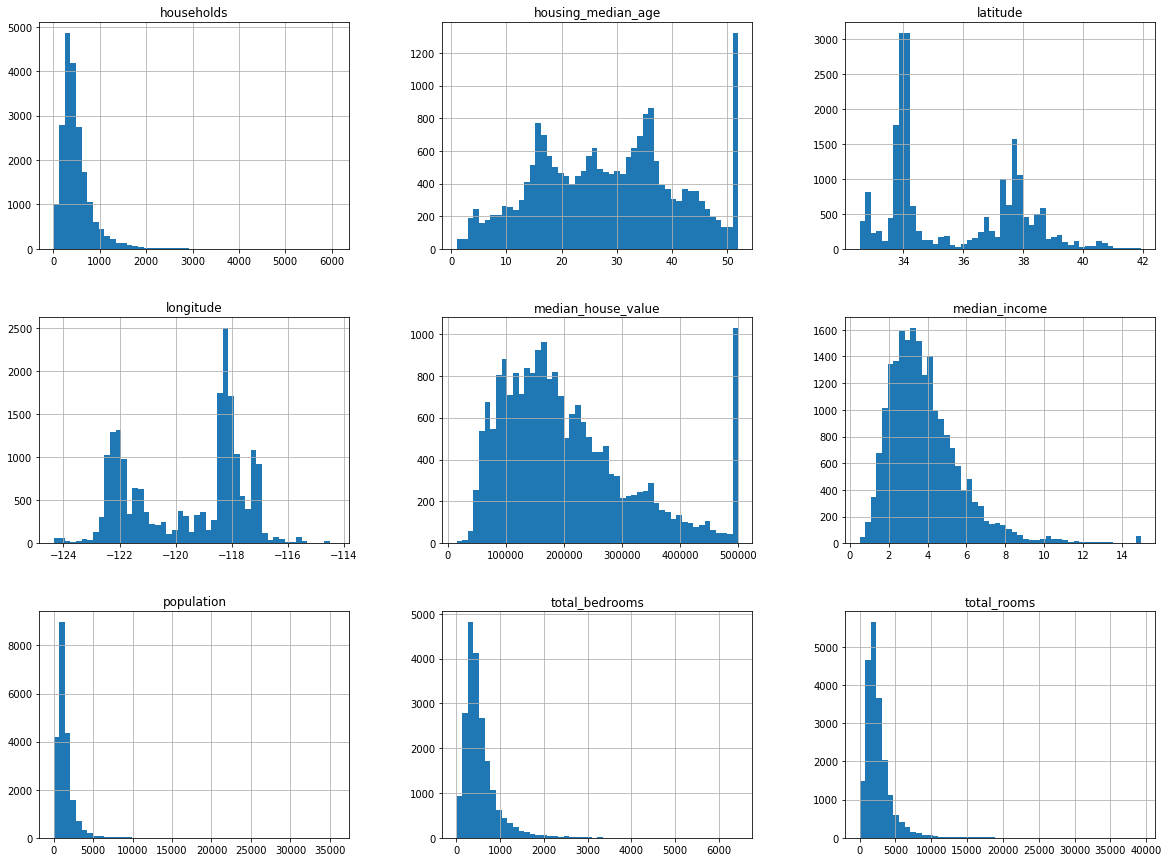

In [6]:
%matplotlib inline
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

### Create a test set and set it aside

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test_set")


16512 train + 4128 test_set


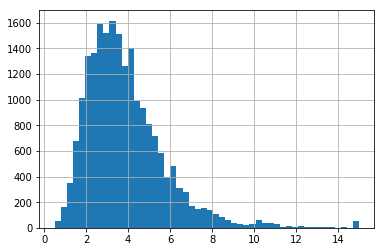

In [15]:
housing_df["median_income"].hist(bins=50)

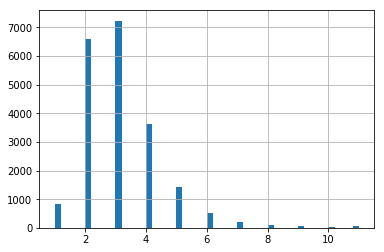

In [13]:
import numpy as np

housing_df["income_cat"] = np.ceil(housing_df["median_income"]/1.5)
housing_df["income_cat"].hist(bins=50) 

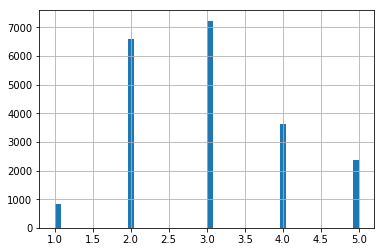

In [16]:
housing_df["income_cat"].where(housing_df["income_cat"]<5, 5.0, inplace=True)
housing_df["income_cat"].hist(bins=50)

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df["income_cat"]):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


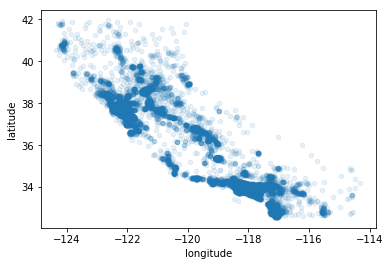

In [20]:
housing_df = strat_train_set.copy()
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

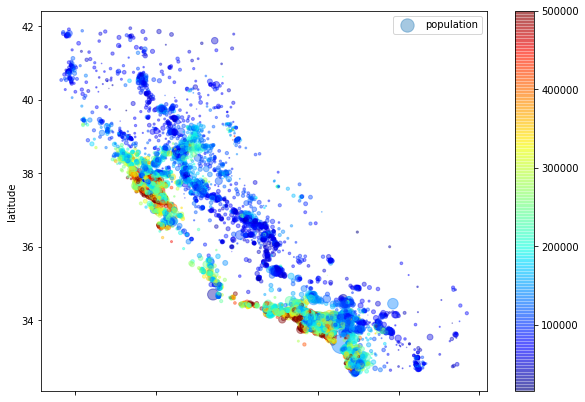

In [24]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    s=housing_df["population"]/100, label="population",
    c=housing_df["median_house_value"], cmap=plt.get_cmap("jet"), colorbar=True)

### correlation

In [30]:
corr_matrix = housing_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

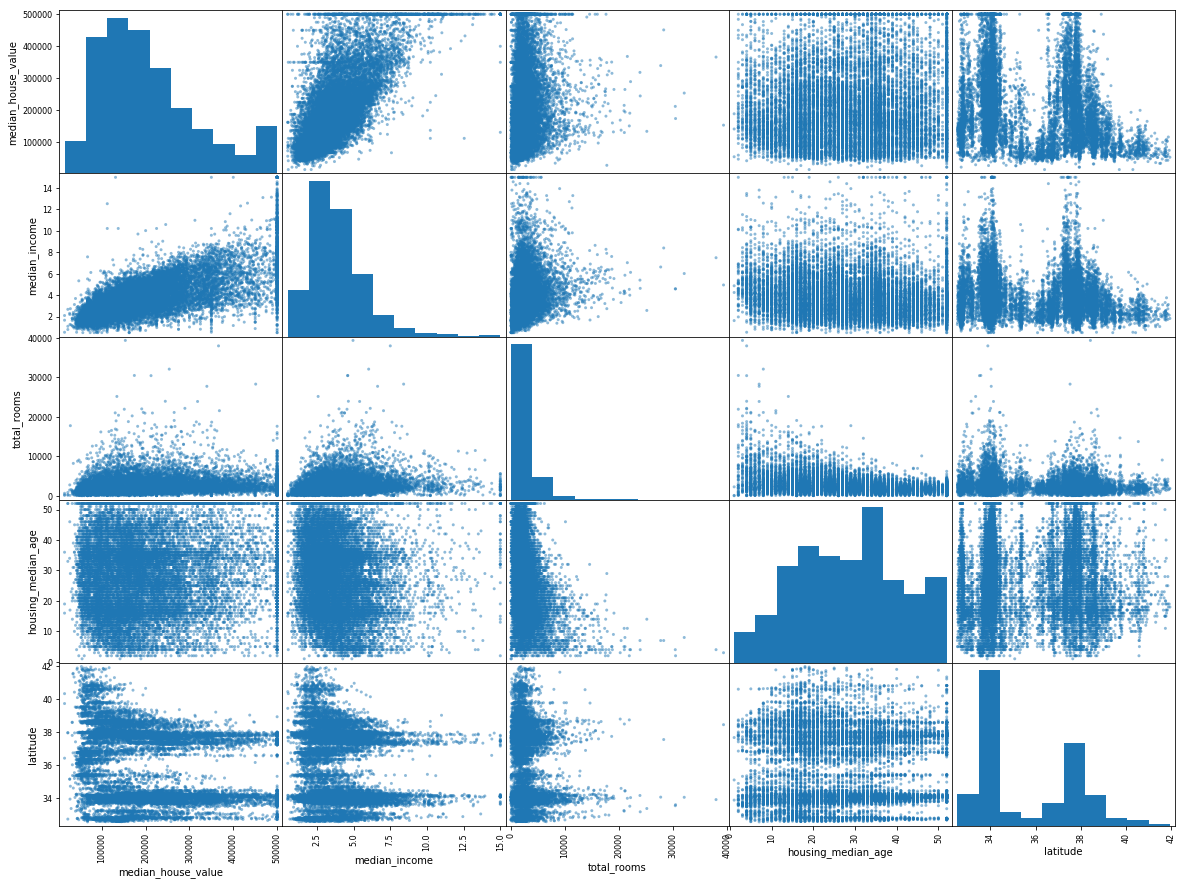

In [36]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_df[attributes], figsize=(20,15))
plt.show()

#### correlation reveals median_income attribute is the most promissing feature to predict the median_house_value

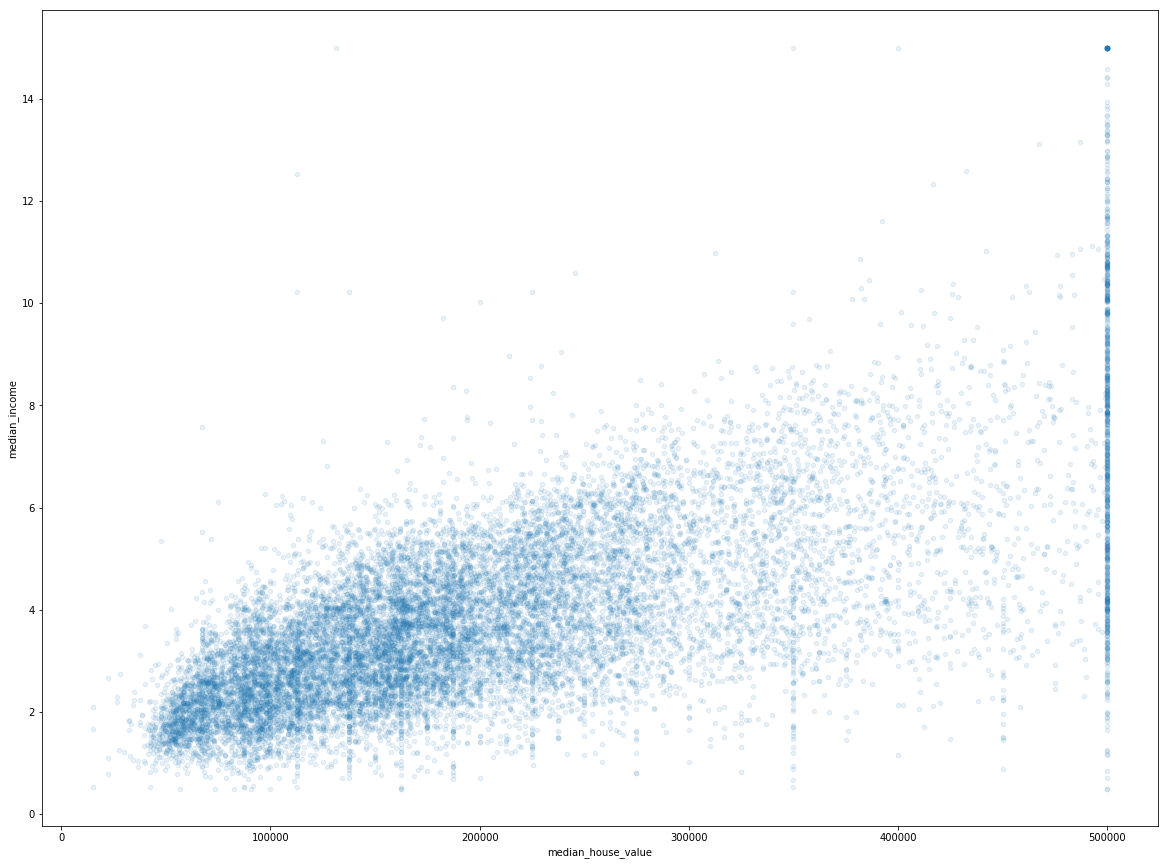

In [39]:
housing_df.plot(kind="scatter", x="median_house_value", y="median_income", alpha=0.1, figsize=(20,15))

In [104]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
housing_num = housing_df.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [105]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [106]:
housing_num.median().values

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [107]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, housing_num.columns)

In [42]:
housing_cat = housing_df["ocean_proximity"]
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [48]:
housing_cat_encoded[:10]


array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0])

In [49]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

one hot encoding

In [66]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [61]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

from sklearn.preprocessing import CategoricalEncoder # in a future version

In [114]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombineAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [81]:
attr_adder = CombineAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attr = attr_adder.transform(housing_df.values)

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import CategoricalEncoder

num_pipeline = Pipeline([('imputer', Imputer(strategy='median')),
                        ('attrib_adder', CombineAttributeAdder()),
                         ('std_scaler', StandardScaler())])


ImportError: cannot import name 'CategoricalEncoder'

In [112]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [109]:
num_attrib = list(housing_num)
cat_attrib = ["ocean_proximity"]


In [110]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [117]:
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attrib)),
                        ('imputer', Imputer(strategy='median')),
                        ('attribs_adder', CombineAttributeAdder()),
                        ('std_scaler', StandardScaler())])
cat_pipeline = Pipeline([('selector', DataFrameSelector(num_attrib)),
                        ('cat_encoder', CategoricalEncoder(encoding='onehot-dense'))])

NameError: name 'CategoricalEncoder' is not defined